 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [2]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from pathlib import Path

%matplotlib inline



# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [3]:
# Reading whale returns
whale_returns = pd.read_csv("whale_returns.csv")

In [4]:
# Count nulls
whale_null_counts = whale_returns.isnull().sum()
# print("Null counts in whale_returns:")
print(whale_null_counts)

Date                           0
SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64


In [7927]:
# Drop nulls
whale_returns = whale_returns.dropna()

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [7928]:
# Reading algorithmic returns
algo_returns = pd.read_csv("algo_returns.csv")

In [7929]:
# Count nulls
algo_null_counts = algo_returns.isnull().sum()

print("\nNull counts in algo_returns:")
print(algo_null_counts)



Null counts in algo_returns:
Date      0
Algo 1    0
Algo 2    6
dtype: int64


In [7930]:
# Drop nulls
algo_returns = algo_returns.dropna()

print(algo_returns.dtypes)

Date       object
Algo 1    float64
Algo 2    float64
dtype: object


## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [7931]:
# Reading S&P TSX 60 Closing Prices
sp_tsx_history = pd.read_csv("sp_tsx_history.csv")

In [7932]:
# Check Data Types
print("Data Types in sp_tsx_history:")
print(sp_tsx_history.dtypes)

Data Types in sp_tsx_history:
Date     object
Close    object
dtype: object


In [7933]:
# Fix Data Types
sp_tsx_history['Date'] = pd.to_datetime(sp_tsx_history['Date'])
# Assuming 'Close' is the column with values like "$12,370.19"
sp_tsx_history['Close'] = sp_tsx_history['Close'].apply(lambda x: float(str(x).replace('$', '').replace(',', '')))
print(sp_tsx_history.dtypes)

Date     datetime64[ns]
Close           float64
dtype: object


In [7934]:

# Sort DataFrame by date in ascending order
sp_tsx_history = sp_tsx_history.sort_values('Date')

# Calculate daily returns
sp_tsx_history['Daily Returns'] = sp_tsx_history['Close'].pct_change()

# Display the DataFrame with daily returns
print(sp_tsx_history)

           Date     Close  Daily Returns
0    2012-10-01  12370.19            NaN
1    2012-10-02  12391.23       0.001701
2    2012-10-03  12359.47      -0.002563
3    2012-10-04  12447.68       0.007137
4    2012-10-05  12418.99      -0.002305
...         ...       ...            ...
1813 2019-12-20  17118.44       0.003188
1814 2019-12-23  17128.71       0.000600
1815 2019-12-24  17180.15       0.003003
1816 2019-12-27  17168.21      -0.000695
1817 2019-12-30  17098.56      -0.004057

[1818 rows x 3 columns]


In [7935]:
# Drop nulls
sp_tsx_history = sp_tsx_history.dropna()


In [7936]:
# Rename `Close` Column to be specific to this portfolio.
sp_tsx_history = sp_tsx_history.rename(columns={'Close': 'Portfolio_Close'})
print(sp_tsx_history)

           Date  Portfolio_Close  Daily Returns
1    2012-10-02         12391.23       0.001701
2    2012-10-03         12359.47      -0.002563
3    2012-10-04         12447.68       0.007137
4    2012-10-05         12418.99      -0.002305
5    2012-10-09         12273.57      -0.011709
...         ...              ...            ...
1813 2019-12-20         17118.44       0.003188
1814 2019-12-23         17128.71       0.000600
1815 2019-12-24         17180.15       0.003003
1816 2019-12-27         17168.21      -0.000695
1817 2019-12-30         17098.56      -0.004057

[1817 rows x 3 columns]


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [7937]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
whale_returns['Date'] = pd.to_datetime(whale_returns['Date'])
algo_returns['Date'] = pd.to_datetime(algo_returns['Date'])

combined_df = pd.merge(whale_returns, algo_returns, on='Date', how='outer')
combined_df = pd.merge(combined_df, sp_tsx_history, on='Date', how='outer')

#print(combined_df)

---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

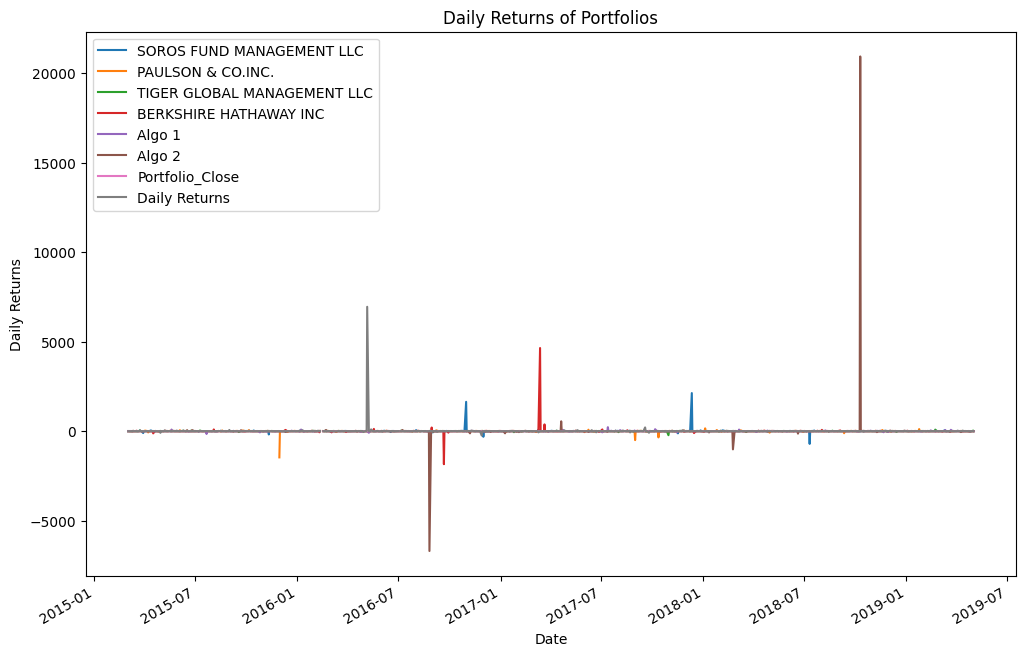

In [7938]:
# Plot daily returns of all portfolios
combined_df.set_index('Date', inplace=True)

combined_df = combined_df.sort_values(by='Date')


# Calculate daily returns
combined_df = combined_df.fillna(0)

daily_returns = combined_df.pct_change().dropna()


# daily_returns =daily_returns.replace([-inf], NaN, inplace=True)
daily_returns.replace([-np.inf], np.nan, inplace=True)
daily_returns.fillna(0, inplace=True)


# Plot daily returns
daily_returns.plot(figsize=(12, 8))
plt.title('Daily Returns of Portfolios')
plt.xlabel('Date')
plt.ylabel('Daily Returns')
plt.legend(loc='upper left')
plt.show()

#### Calculate and Plot cumulative returns.

c:\Users\igwev\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:59: RuntimeWarning: invalid value encountered in accumulate
  return bound(*args, **kwds)


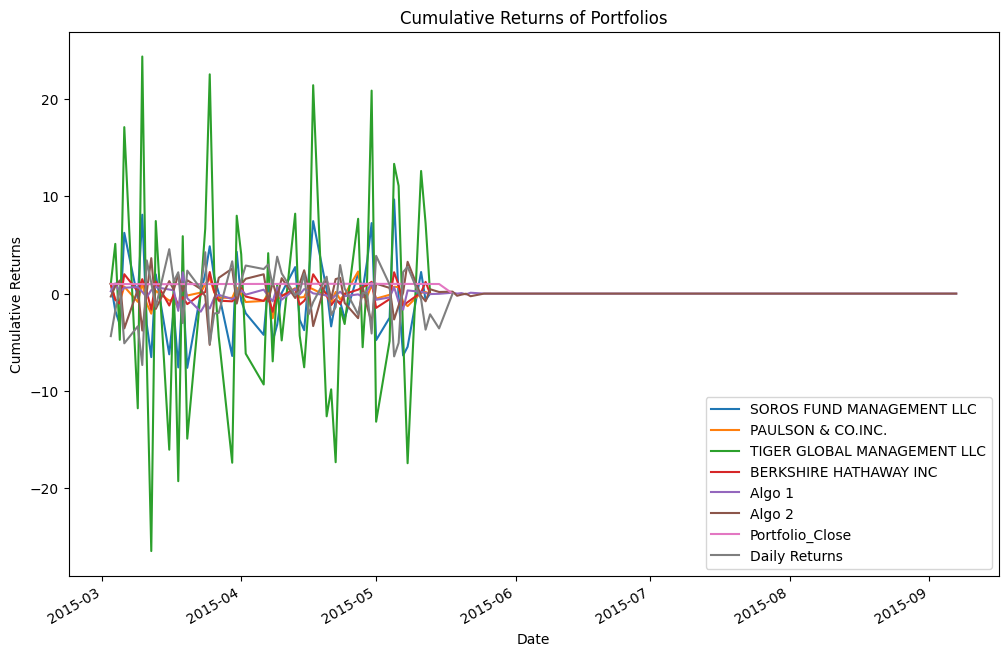

In [7939]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + daily_returns).cumprod()

# Plot cumulative returns
cumulative_returns.plot(figsize=(12, 8))
plt.title('Cumulative Returns of Portfolios')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend(loc='lower right')
plt.show()


---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


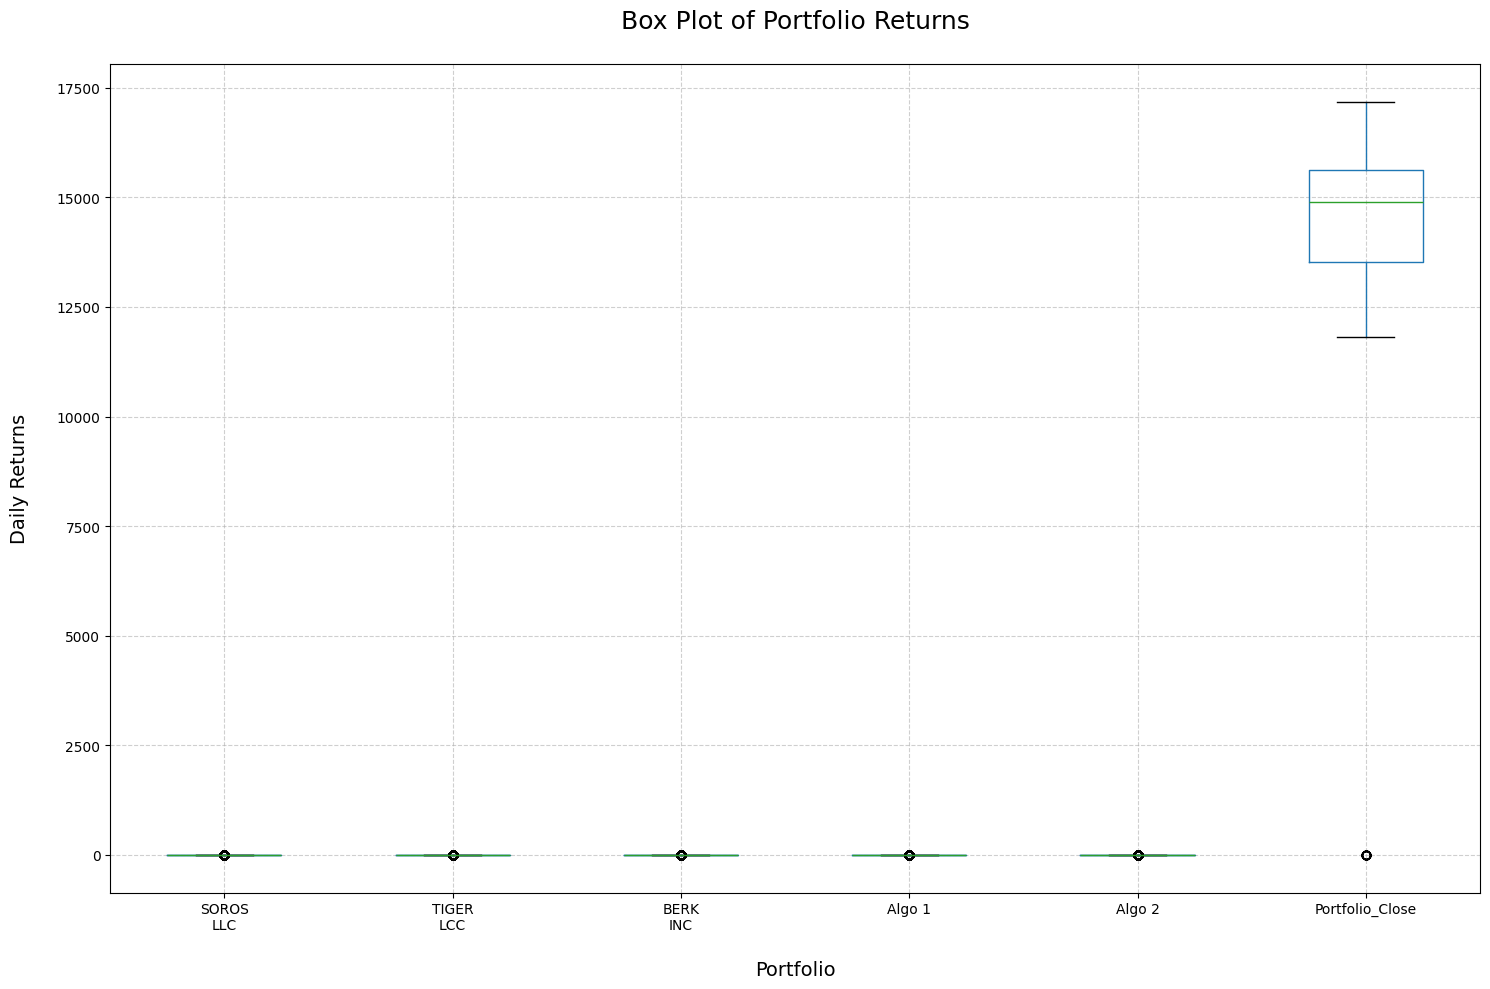

In [7940]:
# Box plot to visually show risk
plt.figure(figsize=(15, 10))

columns_to_boxplot = ['SOROS FUND MANAGEMENT LLC', 'TIGER GLOBAL MANAGEMENT LLC','BERKSHIRE HATHAWAY INC', 'Algo 1', 'Algo 2', 'Portfolio_Close']

valid_columns = [col for col in columns_to_boxplot if col in daily_returns.columns]

ax = combined_df[valid_columns].boxplot(figsize=(12, 8))

ax.set_xticklabels(['SOROS\nLLC', 'TIGER\nLCC','BERK\nINC', 'Algo 1', 'Algo 2', 'Portfolio_Close'] )



plt.title('Box Plot of Portfolio Returns\n', fontsize=18)
plt.xlabel('\nPortfolio', fontsize=14)
plt.ylabel('Daily Returns\n', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### Calculate Standard Deviations

In [7941]:
# Calculate the daily standard deviations of all portfolios
daily_returns.replace([-np.inf, np.inf], np.nan, inplace=True)
daily_returns.dropna(inplace=True)
daily_std = daily_returns.std()

print(daily_std)

SOROS FUND MANAGEMENT LLC       88.751358
PAULSON & CO.INC.               51.418766
TIGER GLOBAL MANAGEMENT LLC      9.971809
BERKSHIRE HATHAWAY INC         158.577751
Algo 1                          13.447419
Algo 2                         694.637437
Portfolio_Close                  0.149776
Daily Returns                  219.530541
dtype: float64


### Determine which portfolios are riskier than the S&P TSX 60

In [7942]:
# Calculate  the daily standard deviation of S&P TSX 60
daily_std_sptsx = daily_returns['Portfolio_Close'].std()

# Determine which portfolios are riskier than the S&P TSX 60
riskier_portfolios = daily_std[daily_std > daily_std_sptsx].index.tolist()

print("Portfolios Riskier than S&P/TSX 60:")
print(riskier_portfolios)

Portfolios Riskier than S&P/TSX 60:
['SOROS FUND MANAGEMENT LLC', 'PAULSON & CO.INC. ', 'TIGER GLOBAL MANAGEMENT LLC', 'BERKSHIRE HATHAWAY INC', 'Algo 1', 'Algo 2', 'Daily Returns']


### Calculate the Annualized Standard Deviation

In [7943]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std_dev = portfolio_std_dev * np.sqrt(252)

print("Annualized Standard Deviation:")
print(annualized_std)

Annualized Standard Deviation:
Open_NFLX                  8.702985e+02
High_NFLX                  8.716339e+02
Low_NFLX                   8.695653e+02
Close_NFLX                 3.804458e-01
Adj Close_NFLX             3.804458e-01
Volume_NFLX                6.328432e+07
Open_AMZN                  3.041732e+02
High_AMZN                  3.041409e+02
Low_AMZN                   3.033924e+02
Close_AMZN                 3.360381e-01
Adj Close_AMZN             3.360381e-01
Volume_AMZN                3.400428e+08
Open                       7.092449e+02
High                       7.147292e+02
Low                        7.044239e+02
Close                      5.693070e-01
Adj Close                  5.693070e-01
Volume                     5.799068e+08
Close_NFLX_weighted        1.270690e-01
Adj Close_NFLX_weighted    1.270690e-01
Close_AMZN_weighted        1.120127e-01
Adj Close_AMZN_weighted    1.120127e-01
Close_weighted             1.897690e-01
Adj Close_weighted         1.897690e-01
sum_colum

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

<Figure size 1500x800 with 0 Axes>

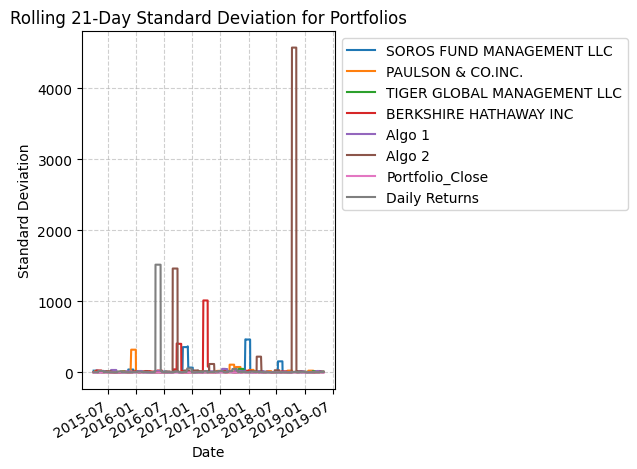

In [7944]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_std = daily_returns.rolling(window=21).std()
# Plot the rolling standard deviation
plt.figure(figsize=(15, 8))
rolling_std.plot(title='Rolling 21-Day Standard Deviation for Portfolios')
plt.xlabel('Date')
plt.ylabel('Standard Deviation')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### Calculate and plot the correlation

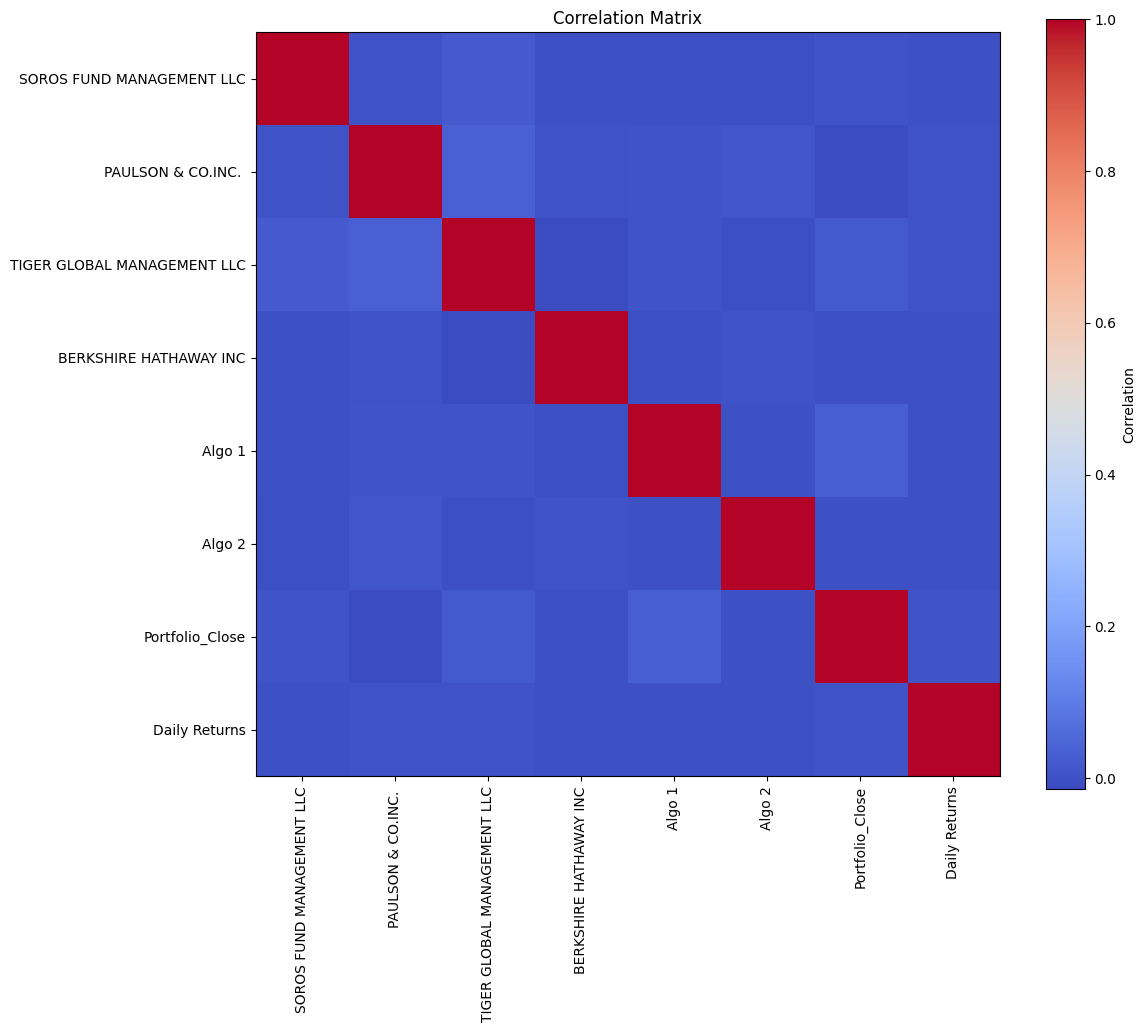

In [7945]:
# Calculate the correlation
correlation_matrix = daily_returns.corr()
# Display de correlation matrix
plt.figure(figsize=(12, 10))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar(label='Correlation')
plt.xticks(range(len(correlation_matrix)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix)), correlation_matrix.columns)
plt.title('Correlation Matrix')
plt.show()

### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

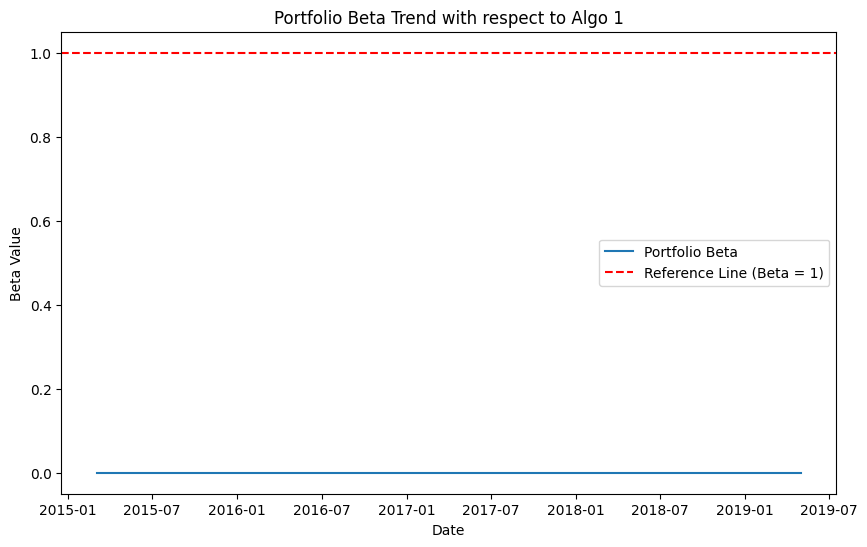

In [7946]:
selected_portfolio = 'Portfolio_Close'

# Calculate covariance matrix
covariance_matrix = daily_returns[[selected_portfolio, 'Algo 1']].cov()

# Calculate variance of 'Algo 1'
benchmark_variance = daily_returns['Algo 1'].var()

# Compute beta
portfolio_beta = covariance_matrix.loc[selected_portfolio, 'Algo 1'] / benchmark_variance

# Plot beta trend
plt.figure(figsize=(10, 6))
plt.plot(daily_returns.index, [portfolio_beta] * len(daily_returns), label='Portfolio Beta')
plt.axhline(y=1, color='r', linestyle='--', label='Reference Line (Beta = 1)')
plt.title(f'Portfolio Beta Trend with respect to Algo 1')
plt.xlabel('Date')
plt.ylabel('Beta Value')
plt.legend()
plt.show()

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [7947]:
# Use `ewm` to calculate the rolling window
ewma_std = daily_returns[selected_portfolio].ewm(halflife=21).std()

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [7948]:
# Annualized Sharpe Ratios
risk_free_rate = 0.01

# Calculate the expected portfolio return (mean of daily returns)
portfolio_return = daily_returns.mean()

# Calculate the standard deviation of the portfolio's returns
portfolio_std_dev = daily_returns.std()

# Calculate the Sharpe Ratio
sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_std_dev * np.sqrt(252)

print(sharpe_ratio)

SOROS FUND MANAGEMENT LLC      0.234116
PAULSON & CO.INC.             -0.988674
TIGER GLOBAL MANAGEMENT LLC   -2.629264
BERKSHIRE HATHAWAY INC         0.229124
Algo 1                        -1.134447
Algo 2                         0.274871
Portfolio_Close               -3.482071
Daily Returns                  0.412577
dtype: float64


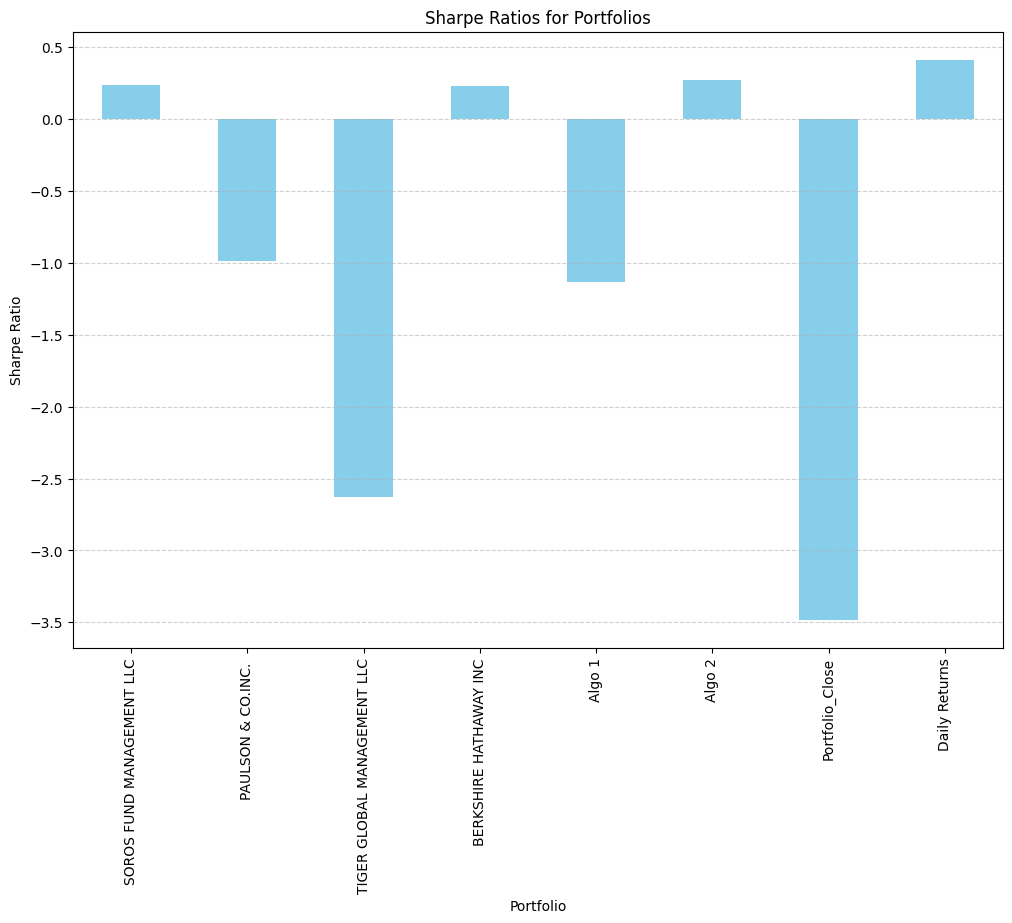

In [7949]:
# Visualize the sharpe ratios as a bar plot
plt.figure(figsize=(12, 8))
sharpe_ratio.plot(kind='bar', color='skyblue')
plt.title('Sharpe Ratios for Portfolios')
plt.xlabel('Portfolio')
plt.ylabel('Sharpe Ratio')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

No, the market strategies out perform the market as seen in the analysis

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [7950]:
# Reading data from 1st stock
NFLX_return = pd.read_csv("NFLX.csv" , parse_dates=['Date'])

In [7951]:
# Reading data from 2nd stock
AMZN_return = pd.read_csv("AMZN.csv" , parse_dates=['Date'])

In [7952]:
# Reading data from 3rd stock
TSLA_return = pd.read_csv("TSLA (1).csv" , parse_dates=['Date'])

In [7953]:
# Combine all stocks in a single DataFrame

combined_df = pd.merge(NFLX_return, AMZN_return, on='Date', how='outer', suffixes=('_NFLX', '_AMZN'))
combined_df = pd.merge(combined_df, TSLA_return, on='Date', how='outer', suffixes=('', '_TSLA'))

# Set 'Date' column as the index
combined_df.set_index('Date', inplace=True)





In [7954]:
# Reset Date index
pivot_df = combined_df.reset_index()

In [7955]:
# Reorganize portfolio data by having a column per symbol


In [7956]:
# Calculate daily returns
close_columns = combined_df.filter(like='Close').columns

# Drop NAs
returns_df = returns_df.dropna()
# Display sample data

combined_df[close_columns] = combined_df[close_columns].pct_change()
returns_df = combined_df[close_columns]


returns_df = returns_df.dropna()



## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [7957]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
weighted_returns = returns_df * (1/3)

portfolio_returns = weighted_returns.sum()
# Display sample data

weighted_returns = weighted_returns.add_suffix('_weighted')

weighted_returns['sum_columns'] = weighted_returns['Close_NFLX_weighted'] + weighted_returns['Close_AMZN_weighted'] + weighted_returns['Close_weighted']

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [7958]:
# Join your returns DataFrame to the original returns DataFrame
combined_df = combined_df.join(weighted_returns)

In [7959]:
# Only compare dates where return data exists for all the stocks (drop NaNs)


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [7960]:
# Calculate the annualized `std`
annualized_std = combined_df.std() * (252 ** 0.5)
print(annualized_std)

Open_NFLX                  8.702985e+02
High_NFLX                  8.716339e+02
Low_NFLX                   8.695653e+02
Close_NFLX                 3.804458e-01
Adj Close_NFLX             3.804458e-01
Volume_NFLX                6.328432e+07
Open_AMZN                  3.041732e+02
High_AMZN                  3.041409e+02
Low_AMZN                   3.033924e+02
Close_AMZN                 3.360381e-01
Adj Close_AMZN             3.360381e-01
Volume_AMZN                3.400428e+08
Open                       7.092449e+02
High                       7.147292e+02
Low                        7.044239e+02
Close                      5.693070e-01
Adj Close                  5.693070e-01
Volume                     5.799068e+08
Close_NFLX_weighted        1.270690e-01
Adj Close_NFLX_weighted    1.270690e-01
Close_AMZN_weighted        1.120127e-01
Adj Close_AMZN_weighted    1.120127e-01
Close_weighted             1.897690e-01
Adj Close_weighted         1.897690e-01
sum_columns                3.231518e-01


### Calculate and plot rolling `std` with 21-day window

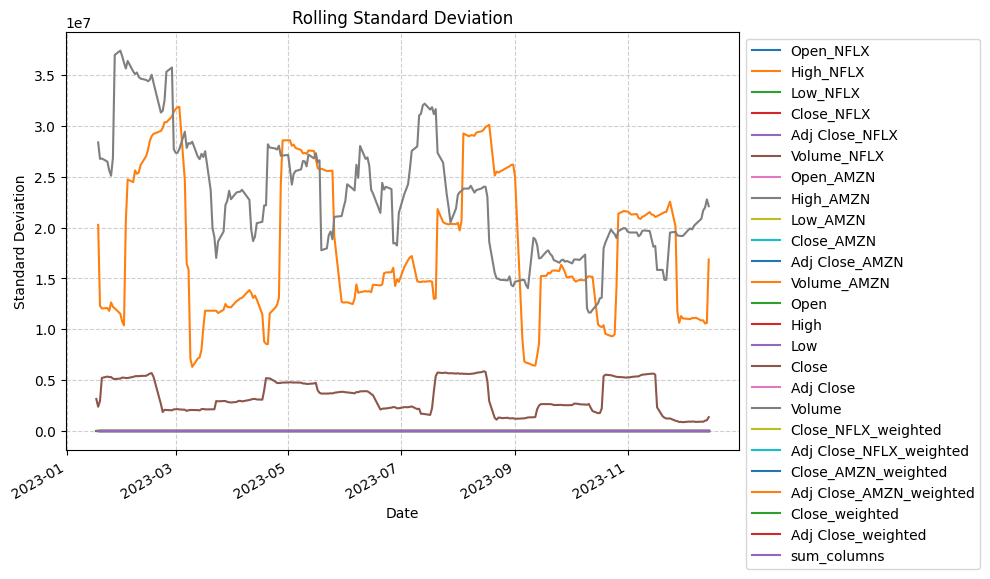

In [7961]:
# Calculate rolling standard deviation
rolling_std = combined_df.rolling(window=21).std()
# Plot rolling standard deviation
rolling_std.plot(title='Rolling Standard Deviation', figsize=(10, 6))
plt.xlabel('Date')
plt.ylabel('Standard Deviation')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### Calculate and plot the correlation

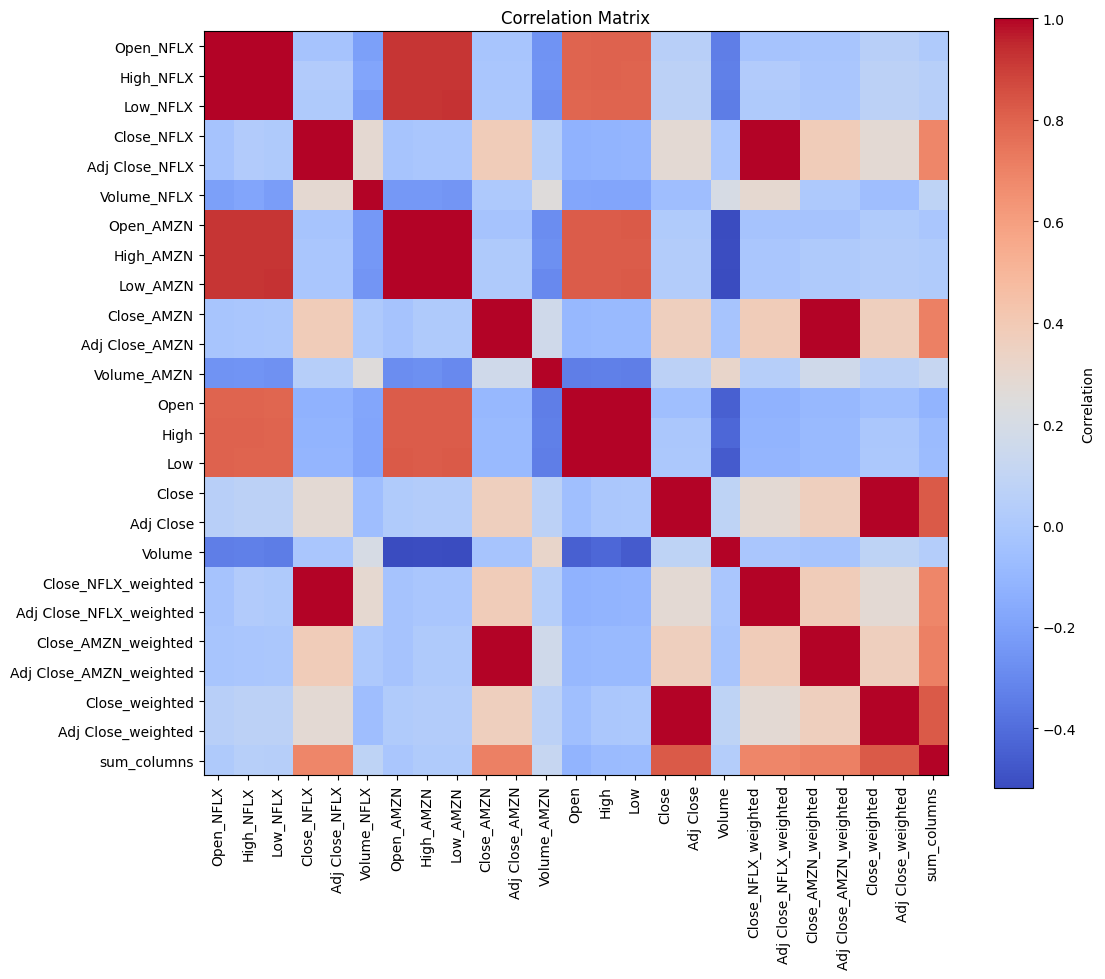

In [7962]:
# Calculate and plot the correlation
correlation_matrix = combined_df.corr()

# Plot the correlation matrix using Matplotlib
plt.figure(figsize=(12, 10))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar(label='Correlation')
plt.xticks(range(len(correlation_matrix)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix)), correlation_matrix.columns)
plt.title('Correlation Matrix')
plt.show()

### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

24608063.21733036


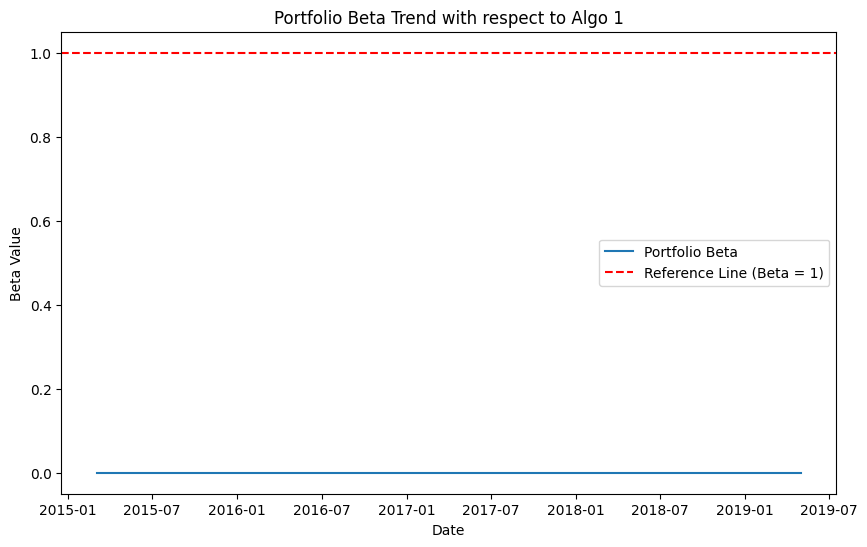

In [7963]:
# Calculate and plot Beta
com_df = pd.merge(combined_df, sp_tsx_history, on='Date', how='outer')

com_df = com_df.fillna(0)

# Calculate covariance matrix
covariance_matrix = com_df[['sum_columns', 'Portfolio_Close']].cov()

benchmark_variance = com_df['Portfolio_Close'].var()

print(benchmark_variance)
# Compute beta
portfolio_beta = covariance_matrix.loc["sum_columns", 'Portfolio_Close'] / benchmark_variance

# Plot beta trend
plt.figure(figsize=(10, 6))
plt.plot(daily_returns.index, [portfolio_beta] * len(daily_returns), label='Portfolio Beta')
plt.axhline(y=1, color='r', linestyle='--', label='Reference Line (Beta = 1)')
plt.title(f'Portfolio Beta Trend with respect to Algo 1')
plt.xlabel('Date')
plt.ylabel('Beta Value')
plt.legend()
plt.show()

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [7964]:
returns = returns_df
risk_free_rate = 0.1 / 252  # Assuming an annual risk-free rate of 10%

# Calculate excess returns
excess_returns = returns - risk_free_rate

# Calculate Sharpe ratios
sharpe_ratios = excess_returns.mean() / excess_returns.std()


print(sharpe_ratios)



Close_NFLX        0.075985
Adj Close_NFLX    0.075985
Close_AMZN        0.092906
Adj Close_AMZN    0.092906
Close             0.065272
Adj Close         0.065272
dtype: float64


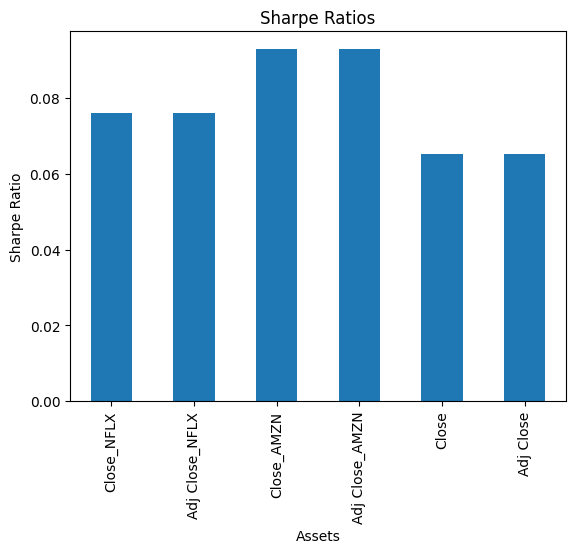

In [7965]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind='bar', title='Sharpe Ratios')
plt.xlabel('Assets')
plt.ylabel('Sharpe Ratio')
plt.show()

### How does your portfolio do?

Write your answer here!

In [ ]:
#the portfolio is less volatile than the benchmark ( S&P 60 TSX) as seen in the rolling beta.


In [7966]:
#the positive annualized standard deviation suggests that the investment has experienced fluctuations in returns, indicating a level of risk and volatility

In [7967]:
#the portfolio is generating excess returns relative to the risk-free rate for each unit of risk (standard deviation) as seen in the sharpe_ratios.